In [1]:
%load_ext autoreload
%autoreload 2

import yaml
import time
import pickle 
import warnings
import scipy
import scipy.sparse.linalg
from collections import defaultdict

from numpy import matrix, asmatrix
from scipy.sparse.sputils import asmatrix

import random
import numpy as np
import fastmat as fm  # need 0.2a3 or later?

import matplotlib.gridspec as gridspec
warnings.filterwarnings("ignore")
from pylab import rcParams

from matplotlib import container
from matplotlib import pyplot as plt
from IPython.core.display import  HTML

import os, sys
module_path = os.path.abspath(os.path.join('../../'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
os.environ['PRJ'] = os.environ['HOME'] + "/skigp/"

random.seed(1337)
np.random.seed(1337)


import os 
import decimal
from collections import defaultdict
# create a new context for this task
ctx = decimal.Context()

# 20 digits should be enough for everyone :D
ctx.prec = 4

def float_to_str(f):
    """
    Convert the given float to a string,
    without resorting to scientific notation
    """
    d1 = ctx.create_decimal(repr(f))
    return format(d1, 'f')

In [2]:
# Importing required packages 

from fkigp.configs import GridSizeFunc

from experiments.plotting import get_fmt, M_rep, plot_attribute, attributes

In [3]:
# Setting up log_directory and run_paths

sweep_id = 'bniv0rnu'
log_dir_path = os.environ['PRJ'] + 'logs/per_iteration/' + sweep_id 

assert os.path.exists(log_dir_path) == True

runs = [log_dir_path + '/' + fname + '/results.yaml' for fname in os.listdir(log_dir_path) if fname.startswith('rid')]

In [4]:
class PerIterDump(object):
    def __init__(self, fname):
        self.fname = fname
        self.data = None 
        assert os.path.exists(fname), fname + " does not exists!"
        self.data_time, self.inf_time, self.num_iters = self.extract_values(fname)
        
    def extract_values(self, fname):
        assert os.path.exists(fname), fname
        self.data = yaml.load(open(fname))
        return self.data['pre_time'], self.data['inf_time'], self.data['num_iters']

    def get_att(self, att_name='#iters'):
        
        if att_name == attributes[0]:
            return self.num_iters
        elif att_name == attributes[1]:
            return self.inf_time / self.num_iters
        elif att_name == attributes[2]:
            return self.data_time + self.inf_time
        elif att_name == attributes[3]:
            return self.data_time
        else:
            raise NotImplementedError

In [5]:
def read_dumps(runs, class_):
    methods = ['cg', 'fcg']
    seeds = [1, 23, 67, 971, 23427, 431241, 2423717, 9871]
    dumps = {}
    for run in runs:
        dump = class_(run)
        data = dump.data
        run_index = seeds.index(data['seed'])
        dumps[(GridSizeFunc(data['gsf']), data['num_samples'], run_index, methods[data['method']-1])] = dump
    return dumps

dumps = read_dumps(runs, PerIterDump)

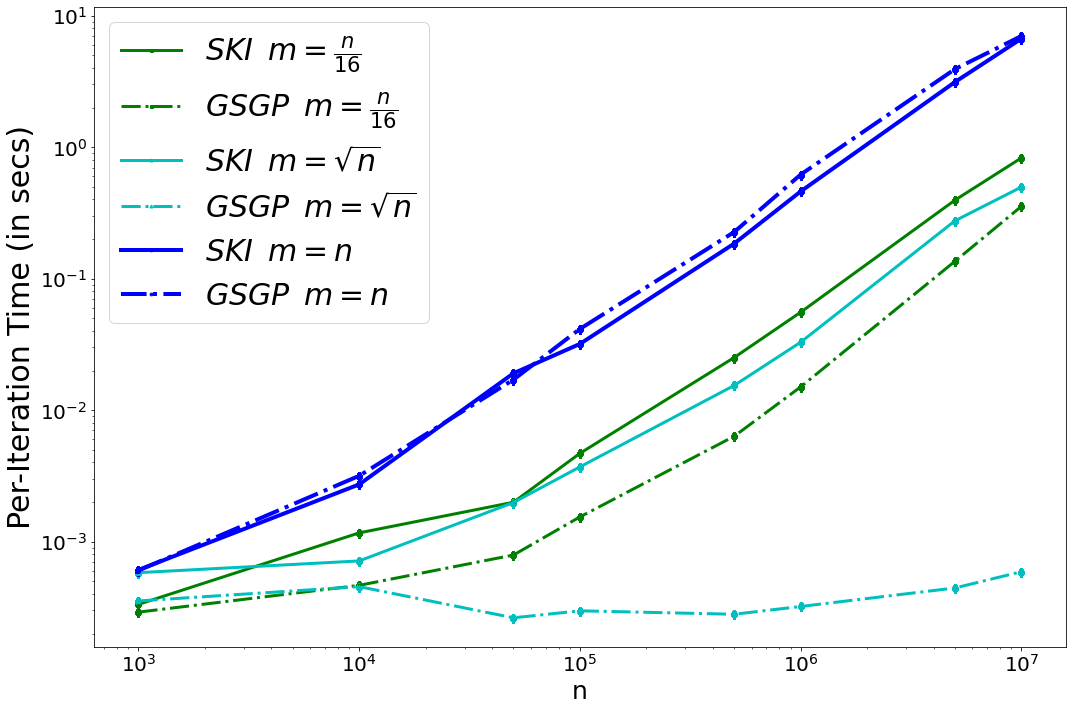

In [7]:
## Figure-3, https://arxiv.org/abs/2101.11751 
grid_size_fs = [GridSizeFunc(gsf) for gsf in [2,3,5]]
plot_attribute(dumps, grid_size_fs, attribute='time/iter', log_scale=True, all_together=True,
               x_label='n',
               y_label='Per-Iteration Time (in secs)'
              )

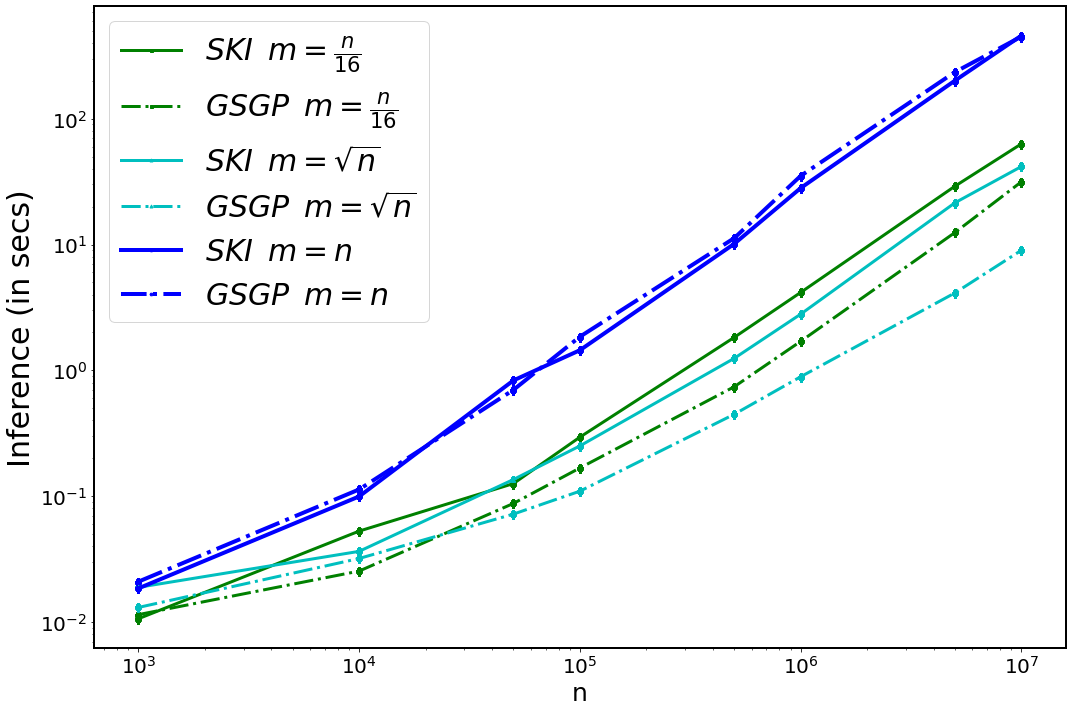

In [8]:
## Inference-time

plot_attribute(dumps, grid_size_fs, attribute='total', log_scale=True, 
               x_label='n',
               all_together=True, y_label='Inference (in secs)',
              show_legends=True)

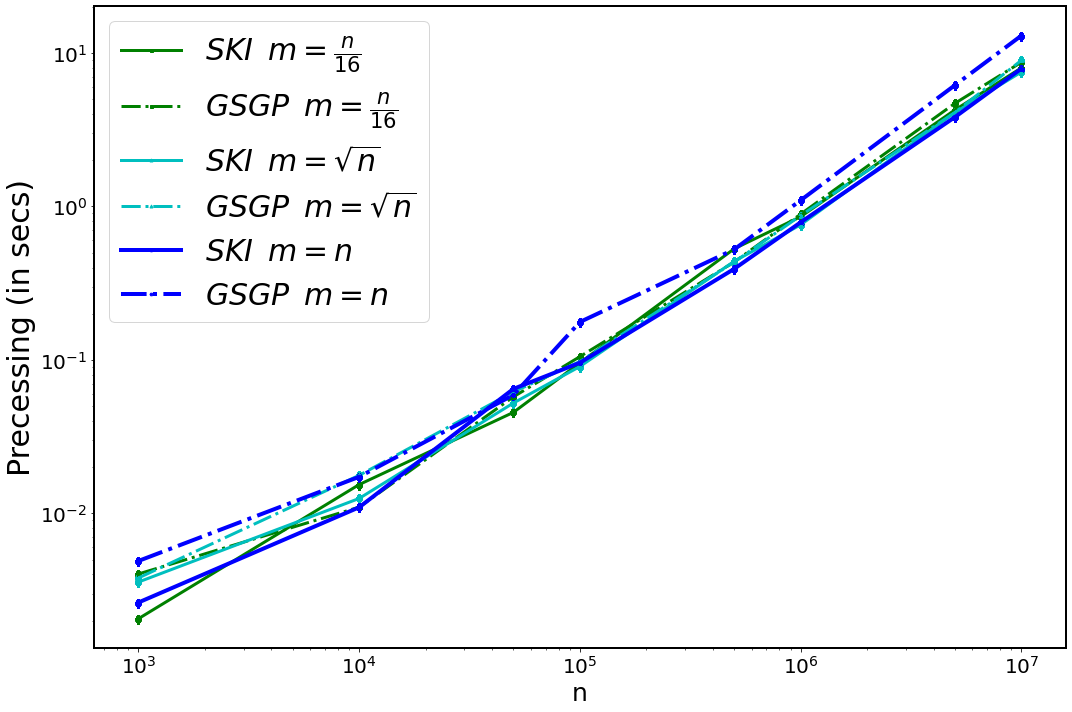

In [9]:
plot_attribute(dumps, grid_size_fs, attribute='time-preprocess', log_scale=True, all_together=True, 
               x_label='n',
               y_label='Precessing (in secs)')

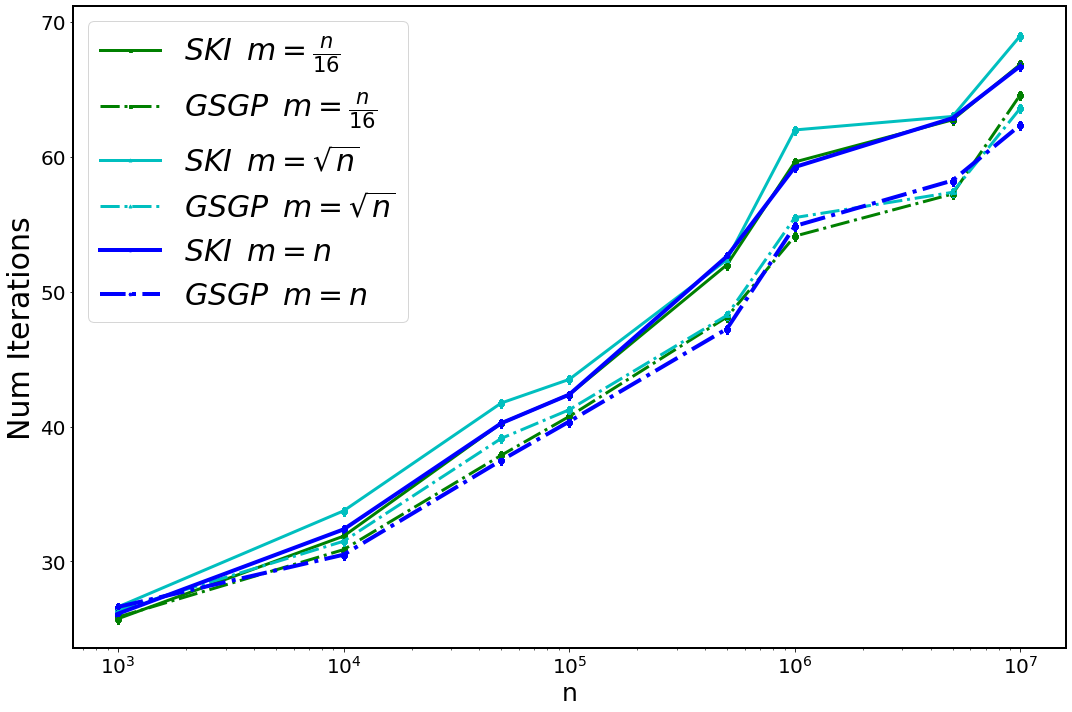

In [10]:
plot_attribute(dumps, grid_size_fs, attribute='#iters', log_scale=False, all_together=True, x_scale_log=True,
              y_label='Num Iterations', x_label='n')

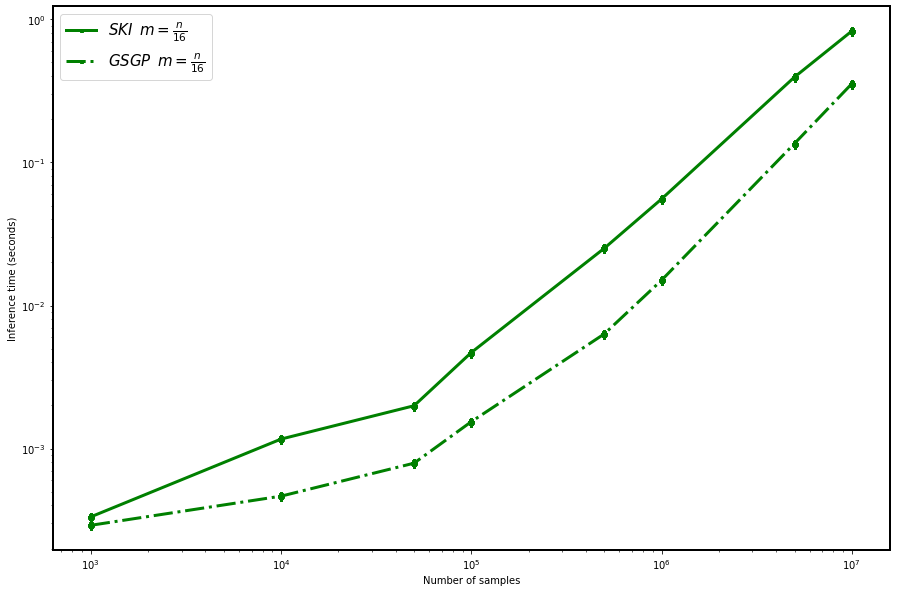

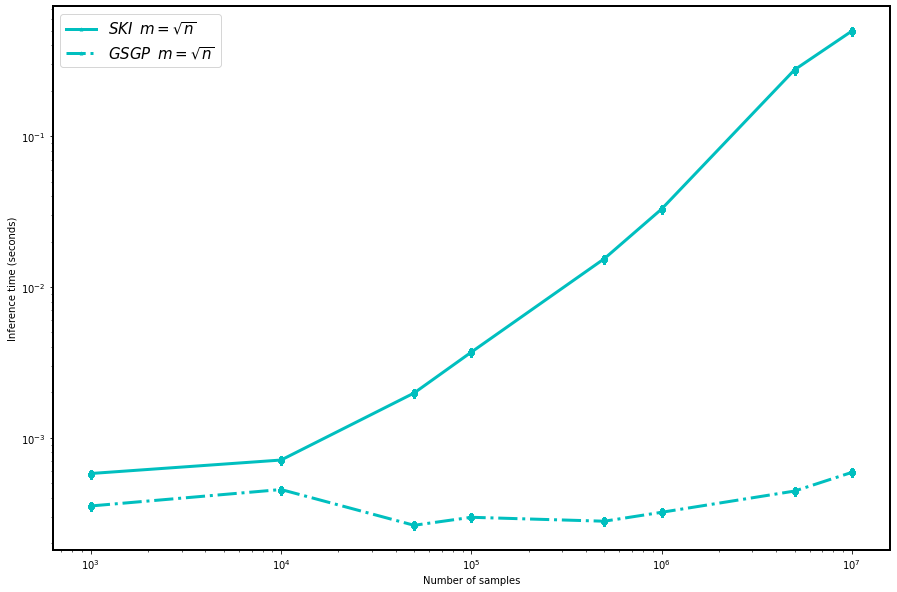

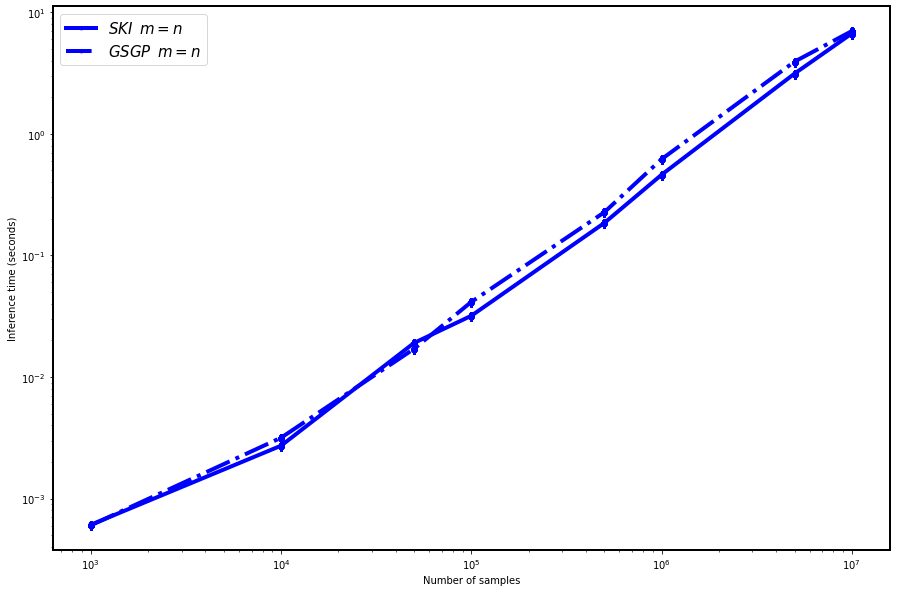

In [11]:
plot_attribute(dumps, grid_size_fs, attribute='time/iter', log_scale=True)

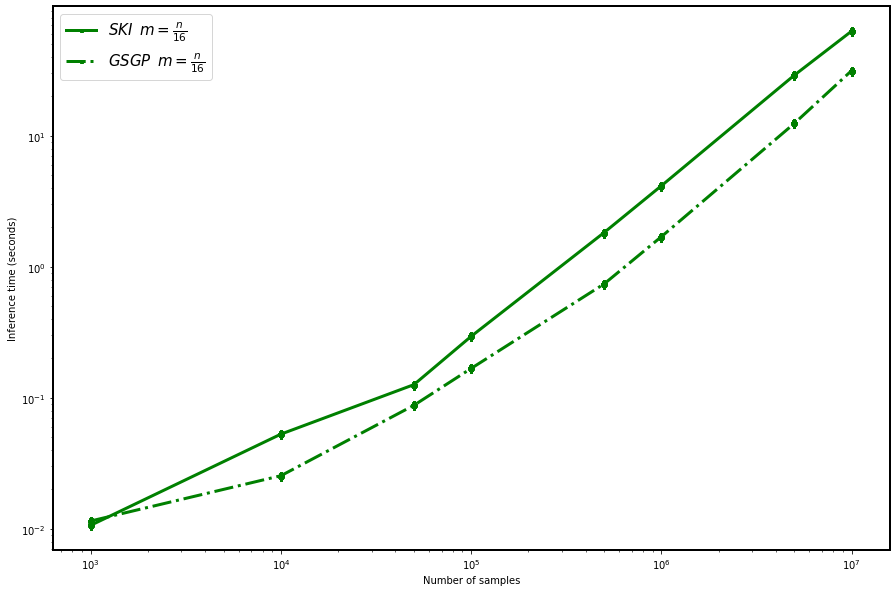

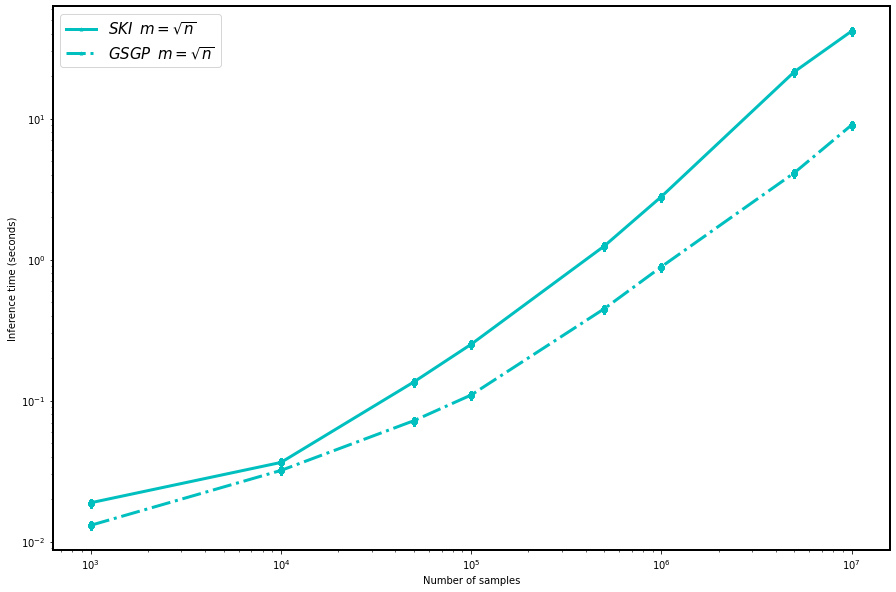

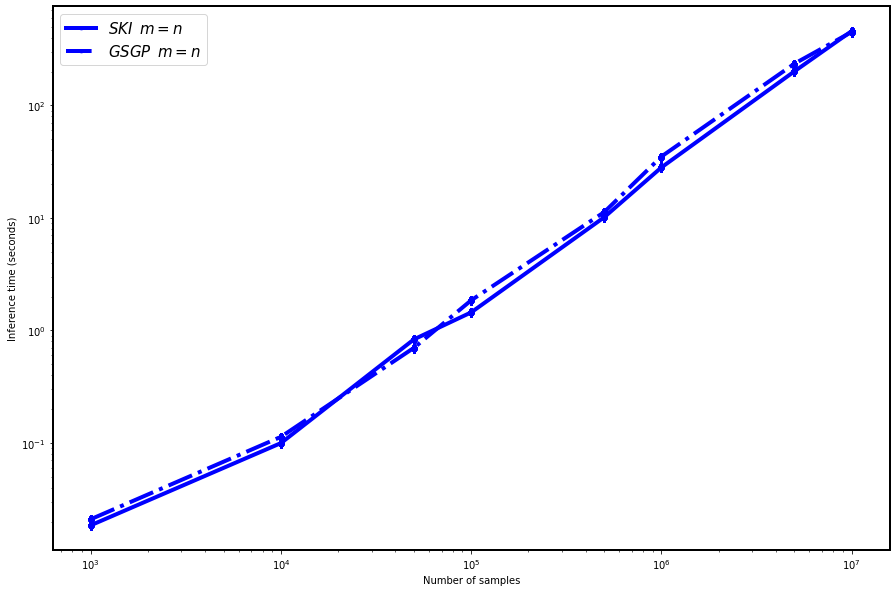

In [12]:
plot_attribute(dumps, grid_size_fs, attribute='total', log_scale=True)

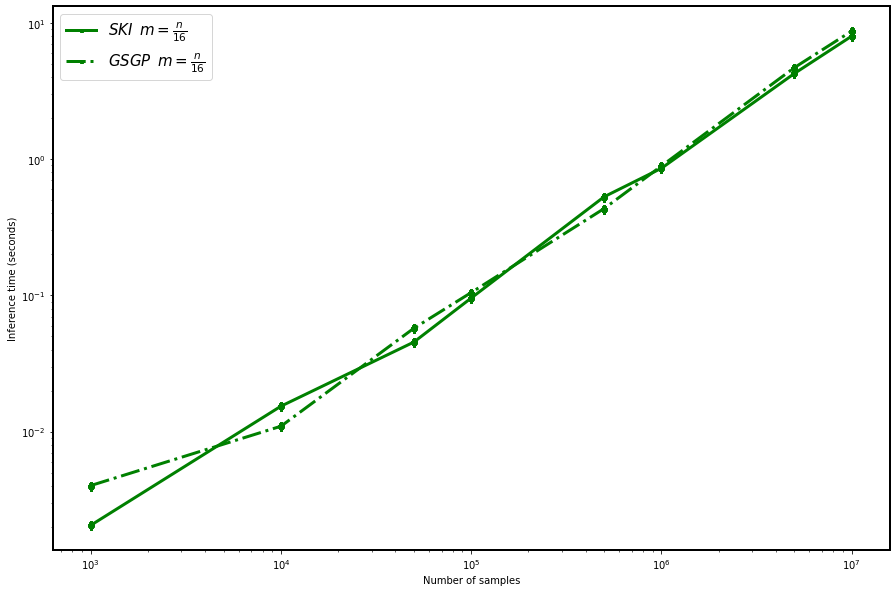

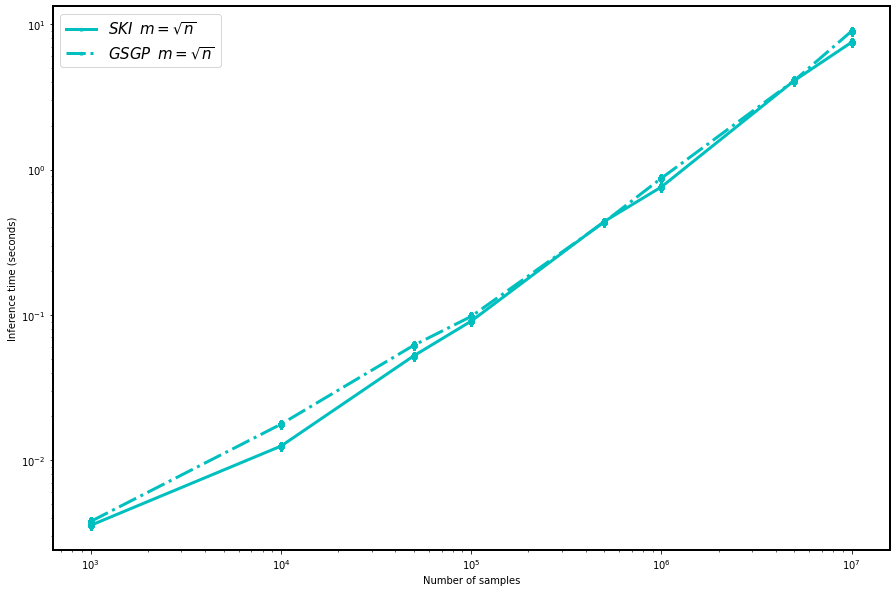

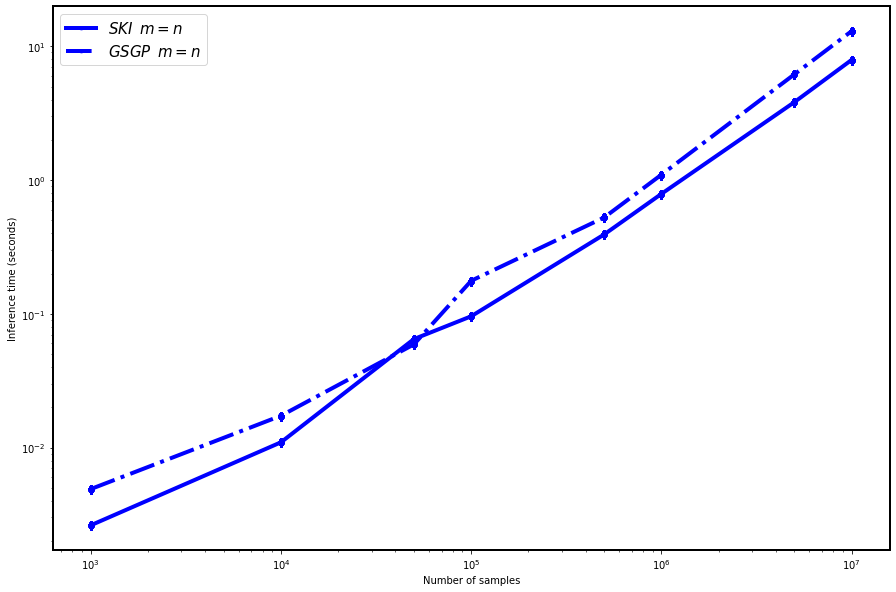

In [13]:
plot_attribute(dumps, grid_size_fs, attribute='time-preprocess', log_scale=True)

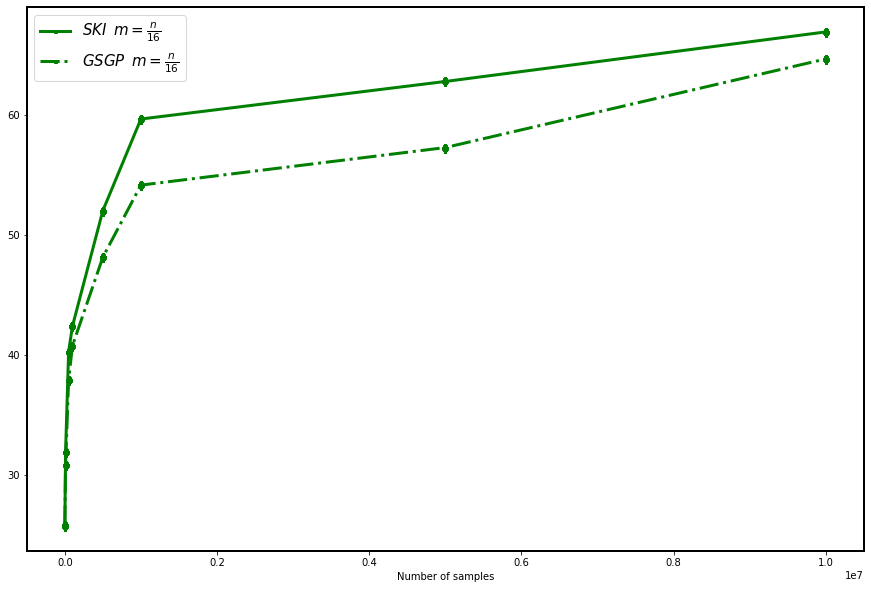

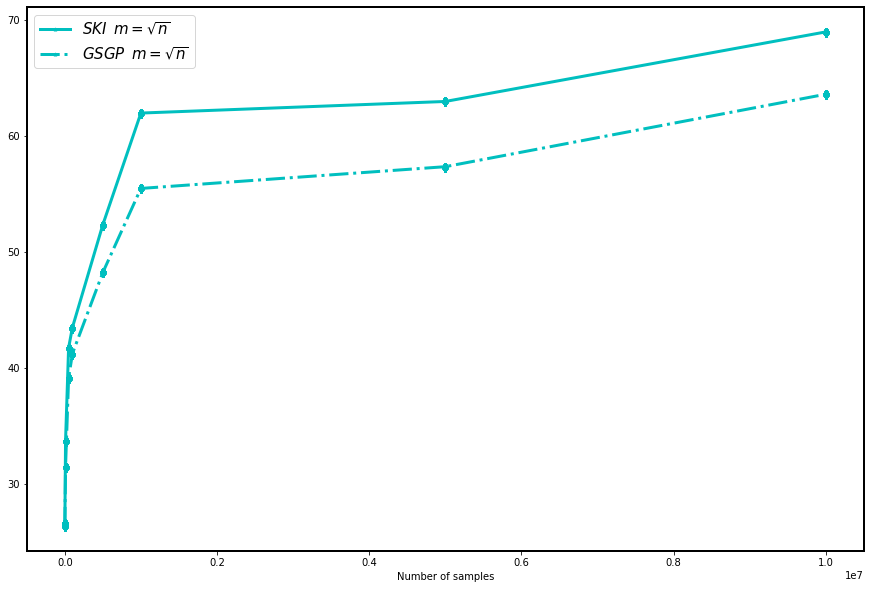

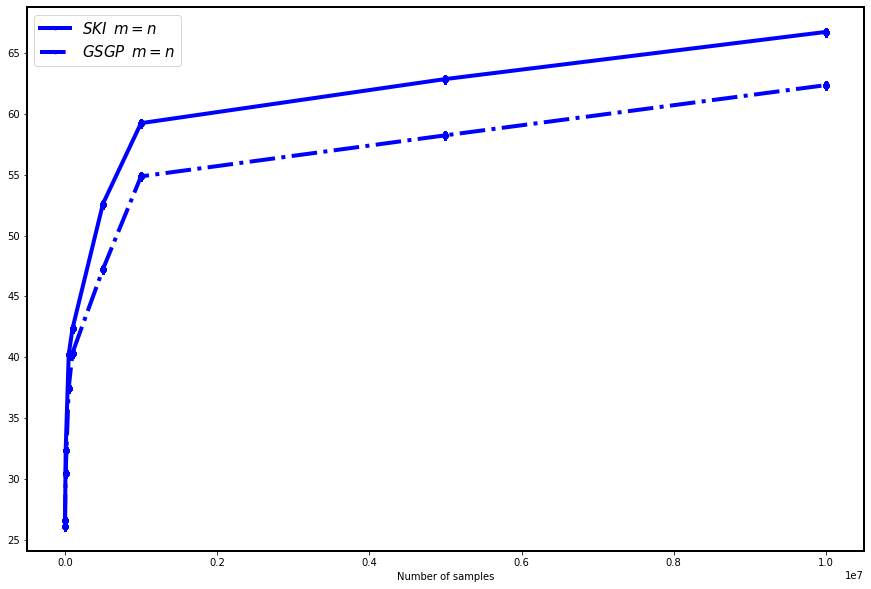

In [14]:
plot_attribute(dumps, grid_size_fs, attribute='#iters', log_scale=False)